A bit of set-up

In [27]:
import os
import anndata as ad 
import pandas as pd
import numpy as np
import scanpy as sc
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib_venn import venn2

In [62]:
Dataset_Home = "/gstore/scratch/u/ghaffars/glmGamPoi/bdev/sublib4/"
BDEV_path="/gstore/data/dld1_concerto/bdev_targets/sublib4"
n_top_genes = 3000

In [11]:
## Load bedv

for root,dirs, files in os.walk(Dataset_Home):
    for file in files:
        file_path = os.path.join(root,file)
        binomial_dev_df = pd.read_csv(file_path)
        binomial_dev_df.columns = ["genes", "x"]
        binomial_dev_df = binomial_dev_df.sort_values("x", ascending = False).reset_index(drop = True)
        BDEV_keep=binomial_dev_df.loc[0:(n_top_genes-1),:]
        BDEV = BDEV_keep["genes"].tolist()
        pkl_filename = os.path.splitext(file)[0]+ '.pkl'
        BDEV_file = os.path.join(BDEV_path,pkl_filename)
        with open(BDEV_file, "wb") as fp:   #Pickling
            pickle.dump(BDEV, fp)



## Check for each sublibs

In [3]:
sublib1_df = pd.read_csv("/gstore/scratch/u/ghaffars/glmGamPoi/bdev/nopos_controls_sublib1_top3000_bdev.csv")
sublib2_df = pd.read_csv("/gstore/scratch/u/ghaffars/glmGamPoi/bdev/nopos_controls_sublib2_top3000_bdev.csv")
sublib3_df = pd.read_csv("/gstore/scratch/u/ghaffars/glmGamPoi/bdev/nopos_controls_sublib3_top3000_bdev.csv")
sublib4_df = pd.read_csv("/gstore/scratch/u/ghaffars/glmGamPoi/bdev/nopos_controls_sublib4_top3000_bdev.csv")

In [4]:
sublib1_bdev=sublib1_df["Symbol"].tolist()
sublib2_bdev=sublib2_df["Symbol"].tolist()
sublib3_bdev=sublib3_df["Symbol"].tolist()
sublib4_bdev=sublib4_df["Symbol"].tolist()

In [17]:
%%time
genes=[]
Com_Genes=[]
for root,dirs, files in os.walk(Dataset_Home):
    for file in files:
        file_path = os.path.join(root,file)
        binomial_dev_df = pd.read_csv(file_path)
        binomial_dev_df.columns = ["genes", "x"]
        binomial_dev_df = binomial_dev_df.sort_values("x", ascending = False).reset_index(drop = True)
        BDEV_keep=binomial_dev_df.loc[0:(n_top_genes-1),:]
        BDEV = BDEV_keep["genes"].tolist()
        filename = os.path.splitext(file)[0].split("_")[1]
        Com = len(set(sublib4_bdev).intersection(BDEV))
        genes.append(filename)
        Com_Genes.append(Com)
        
        
        
        

CPU times: user 1min 30s, sys: 3.9 s, total: 1min 34s
Wall time: 3min 24s


In [7]:
df = pd.DataFrame({'Gene_name':genes,
                   'Com_Genes_No':Com_Genes})

In [8]:
df.to_csv("genes_sublib4.csv", index=0)

## Sublib1

In [10]:
df = pd.read_csv("genes_sublib1.csv")

<AxesSubplot: xlabel='Com_Genes_No', ylabel='Count'>

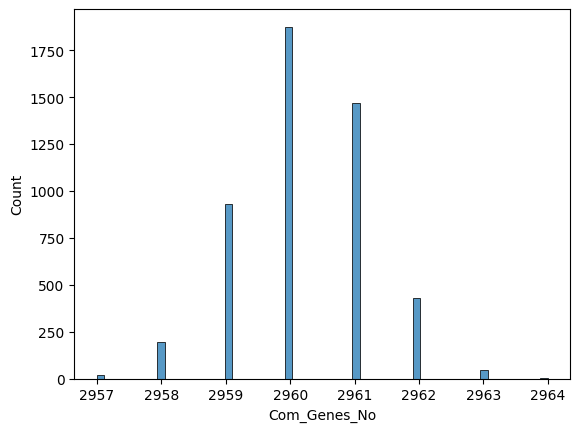

In [12]:
sns.histplot(x=df["Com_Genes_No"])

<AxesSubplot: ylabel='Com_Genes_No'>

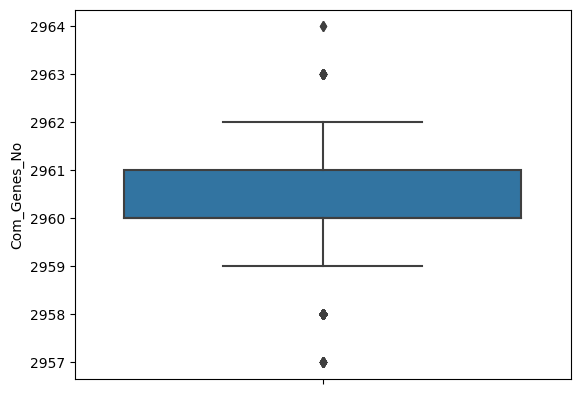

In [14]:
sns.boxplot(y=df["Com_Genes_No"])

## Sublib2

In [16]:
df = pd.read_csv("genes_sublib2.csv")

<AxesSubplot: xlabel='Com_Genes_No', ylabel='Count'>

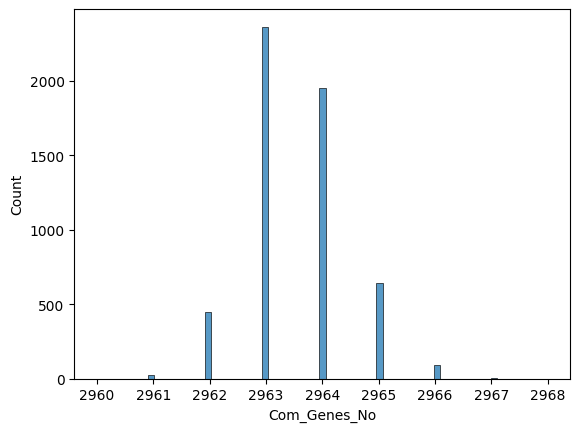

In [19]:
sns.histplot(x=df["Com_Genes_No"])

## Sublib3

In [21]:
df = pd.read_csv("genes_sublib3.csv")

<AxesSubplot: xlabel='Com_Genes_No', ylabel='Count'>

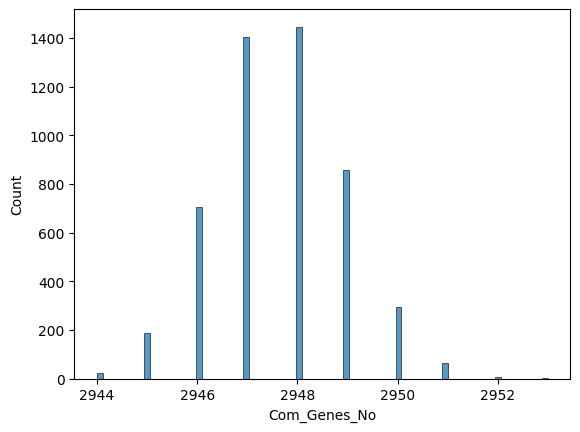

In [22]:
sns.histplot(x=df["Com_Genes_No"])

## Sublib3

In [23]:
df = pd.read_csv("genes_sublib4.csv")

<AxesSubplot: xlabel='Com_Genes_No', ylabel='Count'>

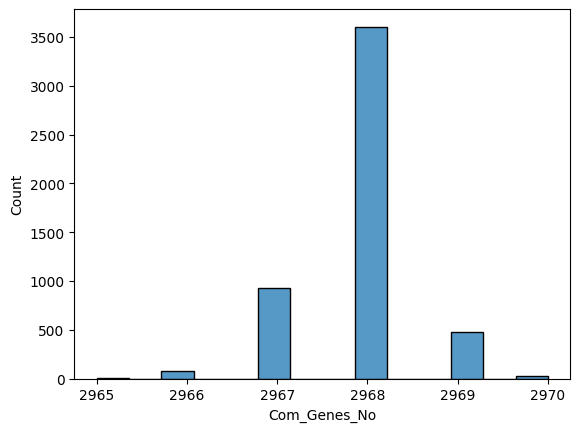

In [24]:
sns.histplot(x=df["Com_Genes_No"])

## Union

### sublib1

In [23]:
%%time
Union_all=set()
for root,dirs, files in os.walk(Dataset_Home):
    for file in files:
        file_path = os.path.join(root,file)
        binomial_dev_df = pd.read_csv(file_path)
        binomial_dev_df.columns = ["genes", "x"]
        binomial_dev_df = binomial_dev_df.sort_values("x", ascending = False).reset_index(drop = True)
        BDEV_keep=binomial_dev_df.loc[0:(n_top_genes-1),:]
        BDEV = BDEV_keep["genes"].tolist()
        filename = os.path.splitext(file)[0].split("_")[1]
        Union_all = set(BDEV).union(Union_all)
        
        
        
        

CPU times: user 1min 34s, sys: 8.46 s, total: 1min 43s
Wall time: 1min 50s


In [25]:
len(Union_all)

3062

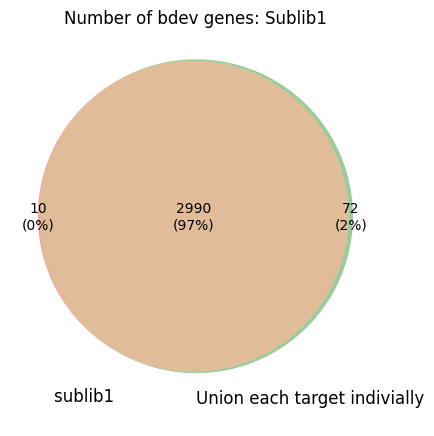

In [46]:
Title='Number of bdev genes: Sublib1'
total = len(Union_all.union(sublib1_bdev))
venn2([set(sublib1_bdev), Union_all],set_labels = ('sublib1               \n', 'Union each target indivially'),
      subset_label_formatter=lambda x: str(x) + "\n(" + f"{(x/total):1.0%}" + ")")
plt.title(Title)
plt.show()

### sublib2

In [48]:
%%time
Union_all_2=set()
for root,dirs, files in os.walk(Dataset_Home):
    for file in files:
        file_path = os.path.join(root,file)
        binomial_dev_df = pd.read_csv(file_path)
        binomial_dev_df.columns = ["genes", "x"]
        binomial_dev_df = binomial_dev_df.sort_values("x", ascending = False).reset_index(drop = True)
        BDEV_keep=binomial_dev_df.loc[0:(n_top_genes-1),:]
        BDEV = BDEV_keep["genes"].tolist()
        filename = os.path.splitext(file)[0].split("_")[1]
        Union_all_2 = set(BDEV).union(Union_all_2)

CPU times: user 1min 43s, sys: 6.01 s, total: 1min 49s
Wall time: 3min 51s


In [49]:
len(Union_all_2)

3067

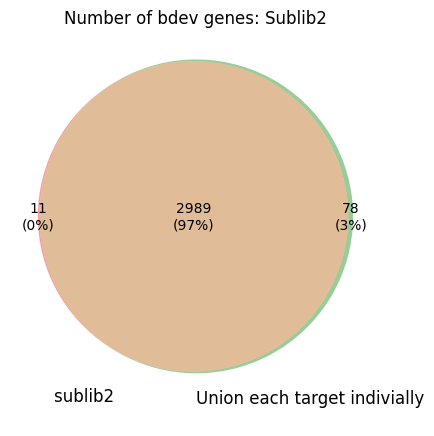

In [52]:
Title='Number of bdev genes: Sublib2'
total = len(Union_all_2.union(sublib2_bdev))
venn2([set(sublib2_bdev), Union_all_2],set_labels = ('sublib2               \n', 'Union each target indivially'),
      subset_label_formatter=lambda x: str(x) + "\n(" + f"{(x/total):1.0%}" + ")")
plt.title(Title)
plt.show()

### sublib3

In [59]:
%%time
Union_all_3=set()
for root,dirs, files in os.walk(Dataset_Home):
    for file in files:
        file_path = os.path.join(root,file)
        binomial_dev_df = pd.read_csv(file_path)
        binomial_dev_df.columns = ["genes", "x"]
        binomial_dev_df = binomial_dev_df.sort_values("x", ascending = False).reset_index(drop = True)
        BDEV_keep=binomial_dev_df.loc[0:(n_top_genes-1),:]
        BDEV = BDEV_keep["genes"].tolist()
        filename = os.path.splitext(file)[0].split("_")[1]
        Union_all_3 = set(BDEV).union(Union_all_3)

CPU times: user 1min 33s, sys: 6.62 s, total: 1min 40s
Wall time: 3min 32s


In [60]:
len(Union_all_3)

3070

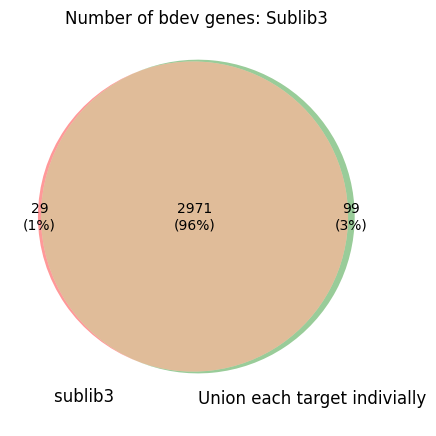

In [61]:
Title='Number of bdev genes: Sublib3'
total = len(Union_all_3.union(sublib3_bdev))
venn2([set(sublib3_bdev), Union_all_3],set_labels = ('sublib3               \n', 'Union each target indivially'),
      subset_label_formatter=lambda x: str(x) + "\n(" + f"{(x/total):1.0%}" + ")")
plt.title(Title)
plt.show()

### sublib4

In [63]:
%%time
Union_all_4=set()
for root,dirs, files in os.walk(Dataset_Home):
    for file in files:
        file_path = os.path.join(root,file)
        binomial_dev_df = pd.read_csv(file_path)
        binomial_dev_df.columns = ["genes", "x"]
        binomial_dev_df = binomial_dev_df.sort_values("x", ascending = False).reset_index(drop = True)
        BDEV_keep=binomial_dev_df.loc[0:(n_top_genes-1),:]
        BDEV = BDEV_keep["genes"].tolist()
        filename = os.path.splitext(file)[0].split("_")[1]
        Union_all_4 = set(BDEV).union(Union_all_4)

CPU times: user 1min 36s, sys: 7.48 s, total: 1min 44s
Wall time: 3min 36s


In [64]:
len(Union_all_4)

3073

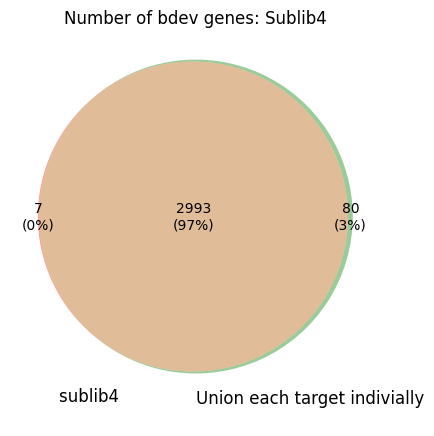

In [65]:
Title='Number of bdev genes: Sublib4'
total = len(Union_all_4.union(sublib4_bdev))
venn2([set(sublib4_bdev), Union_all_4],set_labels = ('sublib4              \n', 'Union each target indivially'),
      subset_label_formatter=lambda x: str(x) + "\n(" + f"{(x/total):1.0%}" + ")")
plt.title(Title)
plt.show()

## Union of all targets separately

In [67]:
len(set.union(*[Union_all,Union_all_2,Union_all_3,Union_all_4]))

3601

## Union od sublibs

In [69]:
len(set.union(*[set(sublib1_bdev),set(sublib2_bdev),set(sublib3_bdev),set(sublib4_bdev)]))

3515